<a href="https://colab.research.google.com/github/shivi13102/Earthquake_analysis/blob/main/Alert_System_Evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

import geopandas as gpd
import plotly.express as px

In [ ]:
df = pd.read_csv("Final_data.csv")
display(df)

,title,magnitude,date_time,cdi,mmi,alert,tsunami,sig,net,nst,...,gap,magType,depth,latitude,longitude,location,country,year,month,earthquake_intensity_category
0,"M 6.6 - 277 km NNE of Codrington, Antigua and ...",6.6,10/7/2023 20:28,5.0,4.0,green,1,802.0,us,95.0,...,37.0,mww,10.000,20.0196,-61.0955,"Codrington, Antigua and Barbuda",Indonesia,2023,10,Moderate
1,"M 7.6 - 95 km WNW of Hihifo, Tonga",7.6,10/5/2023 16:02,8.0,6.0,green,1,907.0,us,111.0,...,17.0,mww,210.097,-15.6002,-174.6080,"Hihifo, Tonga",Indonesia,2023,10,Severe
2,"M 7.6 - Pulau Pulau Tanimbar, Indonesia",7.6,9/1/2023 17:47,5.0,7.0,green,0,957.0,us,114.0,...,21.0,mww,105.249,-7.0852,130.0390,"Pulau Pulau Tanimbar, Indonesia",Indonesia,2023,9,Severe
3,"M 6.5 - 42 km W of Sola, Vanuatu",6.5,8/16/2023 12:47,7.0,4.0,green,0,657.0,us,114.0,...,25.0,mww,192.955,-13.8814,167.1580,"Sola, Vanuatu",Vanuatu,2023,8,Severe
4,M 7.0 - Vanuatu,7.0,8/1/2023 12:32,8.0,7.0,green,1,768.0,us,116.0,...,36.0,mww,29.000,-14.9383,166.8780,Vanuatu,Vanuatu,2023,8,Severe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1307,"M 7.1 - 14 km NE of Cabatuan, Philippines",7.1,5/5/1995 3:53,0.0,7.0,green,0,776.0,us,0.0,...,0.0,mww,16.000,12.6260,125.2970,"Cabatuan, Philippines",Philippines,1995,5,Severe
1308,"M 7.9 - 128 km ESE of Kuril’sk, Russia",7.9,3/12/1995 18:01,0.0,6.0,orange,0,960.0,us,0.0,...,0.0,mww,33.000,44.6630,149.3000,"Kuril’sk, Russia",Indonesia,1995,3,Moderate
1309,"M 6.5 - 50 km SE of Sucúa, Ecuador",6.5,3/10/1995 12:44,0.0,7.0,green,0,650.0,us,0.0,...,0.0,mww,16.700,-2.7780,-77.8510,"Sucúa, Ecuador",Ecuador,1995,3,Severe
1310,"M 7.0 - 45 km SE of Sucúa, Ecuador",7.0,3/10/1995 1:51,0.0,7.0,orange,0,754.0,us,0.0,...,0.0,mww,24.400,-2.7500,-77.8810,"Sucúa, Ecuador",Ecuador,1995,3,Severe


In [ ]:
# Get unique values of the 'alert' column
unique_alerts = df['alert'].unique()

# Print the unique values
print("Unique values in 'alert' column:", unique_alerts)

Unique values in 'alert' column: ['green' 'yellow' 'orange' 'red']


In [ ]:
alert_counts = df['alert'].value_counts()
print(alert_counts)

alert
green     971
orange    237
yellow     87
red        17
Name: count, dtype: int64


# Alert Gap Analysis

In [ ]:
# Function to get expected alert based on event characteristics
def get_expected_alert(row):
    if row['tsunami'] == 1:
        return "red"

    # Red alert for magnitude >= 6.5 and depth < 30
    elif row['magnitude'] >= 6.5 and row['depth'] < 30:
        return "red"

    # Orange alert for magnitude >= 5.5 and depth between 20 and 50
    elif row['magnitude'] >= 5.5 and 20 <= row['depth'] < 50:
        return "orange"

    # Yellow alert for magnitude >= 4.0 and depth between 50 and 100
    elif row['magnitude'] >= 4.0 and 50 <= row['depth'] < 100:
        return "yellow"

    # Green alert for everything else
    else:
        return "green"

df['expected_alert'] = df.apply(get_expected_alert, axis=1)
cols = list(df.columns)
alert_index = cols.index('alert')
cols.insert(alert_index + 1, cols.pop(cols.index('expected_alert')))
df = df[cols]

display(df)

,title,magnitude,date_time,cdi,mmi,alert,expected_alert,tsunami,sig,net,...,gap,magType,depth,latitude,longitude,location,country,year,month,earthquake_intensity_category
0,"M 6.6 - 277 km NNE of Codrington, Antigua and ...",6.6,10/7/2023 20:28,5.0,4.0,green,red,1,802.0,us,...,37.0,mww,10.000,20.0196,-61.0955,"Codrington, Antigua and Barbuda",Indonesia,2023,10,Moderate
1,"M 7.6 - 95 km WNW of Hihifo, Tonga",7.6,10/5/2023 16:02,8.0,6.0,green,red,1,907.0,us,...,17.0,mww,210.097,-15.6002,-174.6080,"Hihifo, Tonga",Indonesia,2023,10,Severe
2,"M 7.6 - Pulau Pulau Tanimbar, Indonesia",7.6,9/1/2023 17:47,5.0,7.0,green,green,0,957.0,us,...,21.0,mww,105.249,-7.0852,130.0390,"Pulau Pulau Tanimbar, Indonesia",Indonesia,2023,9,Severe
3,"M 6.5 - 42 km W of Sola, Vanuatu",6.5,8/16/2023 12:47,7.0,4.0,green,green,0,657.0,us,...,25.0,mww,192.955,-13.8814,167.1580,"Sola, Vanuatu",Vanuatu,2023,8,Severe
4,M 7.0 - Vanuatu,7.0,8/1/2023 12:32,8.0,7.0,green,red,1,768.0,us,...,36.0,mww,29.000,-14.9383,166.8780,Vanuatu,Vanuatu,2023,8,Severe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1307,"M 7.1 - 14 km NE of Cabatuan, Philippines",7.1,5/5/1995 3:53,0.0,7.0,green,red,0,776.0,us,...,0.0,mww,16.000,12.6260,125.2970,"Cabatuan, Philippines",Philippines,1995,5,Severe
1308,"M 7.9 - 128 km ESE of Kuril’sk, Russia",7.9,3/12/1995 18:01,0.0,6.0,orange,orange,0,960.0,us,...,0.0,mww,33.000,44.6630,149.3000,"Kuril’sk, Russia",Indonesia,1995,3,Moderate
1309,"M 6.5 - 50 km SE of Sucúa, Ecuador",6.5,3/10/1995 12:44,0.0,7.0,green,red,0,650.0,us,...,0.0,mww,16.700,-2.7780,-77.8510,"Sucúa, Ecuador",Ecuador,1995,3,Severe
1310,"M 7.0 - 45 km SE of Sucúa, Ecuador",7.0,3/10/1995 1:51,0.0,7.0,orange,red,0,754.0,us,...,0.0,mww,24.400,-2.7500,-77.8810,"Sucúa, Ecuador",Ecuador,1995,3,Severe


In [ ]:
# Get unique values of the 'alert' column
unique_alerts = df['expected_alert'].unique()

# Print the unique values
print("Unique values in 'expected_alert' column:", unique_alerts)

Unique values in 'expected_alert' column: ['red' 'green' 'yellow' 'orange']


In [ ]:
alert_counts = df['alert'].value_counts()
print(alert_counts)

expected_alert_counts = df['expected_alert'].value_counts()
print(expected_alert_counts)

alert
green     971
orange    237
yellow     87
red        17
Name: count, dtype: int64
expected_alert
red       768
green     317
orange    172
yellow     55
Name: count, dtype: int64


In [ ]:
def compute_gap(row):
    if row['alert'] != row['expected_alert']:
        return 1  # There is a mismatch (gap) between the actual and expected alerts
    else:
        return 0  # No gap, the alerts match

# Apply the gap computation function to the dataframe
df['gap'] = df.apply(compute_gap, axis=1)

# Summarize the gap analysis
gap_count = df['gap'].sum()  # Count how many rows have a mismatch
total_count = len(df)  # Total number of rows in the dataset
gap_percentage = (gap_count / total_count) * 100  # Percentage of mismatches

# Display the gap analysis result
print(f"Total number of rows: {total_count}")
print(f"Number of gaps (mismatches between 'alert' and 'expected_alert'): {gap_count}")
print(f"Percentage of gaps: {gap_percentage:.2f}%")

# Optional: Display rows where there is a gap for further inspection
gap_rows = df[df['gap'] == 1][['title', 'magnitude', 'depth', 'cdi','mmi', 'alert', 'expected_alert', 'tsunami', 'gap']]
display(gap_rows)  # Displaying the first few rows with gaps


Total number of rows: 1312
Number of gaps (mismatches between 'alert' and 'expected_alert'): 844
Percentage of gaps: 64.33%


,title,magnitude,depth,cdi,mmi,alert,expected_alert,tsunami,gap
0,"M 6.6 - 277 km NNE of Codrington, Antigua and ...",6.6,10.000,5.0,4.0,green,red,1,1
1,"M 7.6 - 95 km WNW of Hihifo, Tonga",7.6,210.097,8.0,6.0,green,red,1,1
4,M 7.0 - Vanuatu,7.0,29.000,8.0,7.0,green,red,1,1
7,M 7.3 - Alaska Peninsula,7.3,21.000,0.0,5.0,green,red,1,1
8,"M 7.2 - 98 km S of Sand Point, Alaska",7.2,32.571,6.0,6.0,green,red,1,1
...,...,...,...,...,...,...,...,...,...
1306,"M 6.6 - 10 km W of Aianí, Greece",6.6,14.000,0.0,9.0,green,red,0,1
1307,"M 7.1 - 14 km NE of Cabatuan, Philippines",7.1,16.000,0.0,7.0,green,red,0,1
1309,"M 6.5 - 50 km SE of Sucúa, Ecuador",6.5,16.700,0.0,7.0,green,red,0,1
1310,"M 7.0 - 45 km SE of Sucúa, Ecuador",7.0,24.400,0.0,7.0,orange,red,0,1


# Strategies for optimized alerts

## Identify Sources of Gaps:
Analyzing the rows where mismatches occurred between alert and expected_alert. Focusing on the following aspects:

* Magnitude Ranges: Are mismatches higher for certain ranges of magnitudes?
* Community Determined Intensity (CDI): Are certain intensity values causing more mismatches?
* Depth: Is there a correlation between the depth of the earthquake and the mismatches?
* Tsunami Indicator: Are mismatches more frequent when a tsunami is indicated?

In [ ]:
# Analyze mismatches based on key features
mismatch_analysis = df[df['gap'] == 1].groupby('expected_alert').agg({
    'magnitude': ['mean', 'max', 'min'],
    'depth': ['mean', 'max', 'min'],
    'cdi': ['mean', 'max', 'min'],
    'tsunami': 'sum'
}).reset_index()

display(mismatch_analysis)

expected_alert magnitude                depth                        cdi  \
                      mean  max  min       mean     max      min      mean   
0          green  1.345726  7.5  0.0  26.360501  231.00   0.0057  1.814815   
1         orange  7.211818  9.1  6.5  35.978242   49.00  30.0000  2.545455   
2            red  5.951750  9.1  0.0  45.070139  670.81   0.0012  3.678471   
3         yellow  6.892500  8.0  6.5  65.322450   96.00  50.0000  2.525000   

                 tsunami  
   max       min     sum  
0  8.0  0.333333       0  
1  9.0  0.000000       0  
2  9.0  0.000000     428  
3  8.0  0.000000       0

## Strategies for Deriving Alert Conditions

* **Multiparameter Integration:**

The integration of several factors, including as magnitude, depth, and intensity, allows for a thorough assessment of an earthquake's potential impact. This multi-parameter technique improves the accuracy and reliability of issued alarm levels.

* **Threshold Based Classification:**

The development of specific thresholds for each considered parameter makes it easier to classify alert levels systemically. Examples of such thresholds include a magnitude more than or equal to 6.5, a depth of fewer than 30 kilometers, and a Modified Mercalli Intensity (MMI) of VII or greater. These criteria are often determined using historical data and empirical investigations that link these parameters to observable damage patterns.

* **Use of Intensity Scales:**

The use of intensity scales, such as the MMI, allows for the conversion of quantitative seismic data into qualitative judgments of possible damage. This translation leads to the creation of more easily understandable alarm levels. The MMI scale, which goes from I (not felt) to XII (complete damage), provides a standardized way to quantify the impact of an earthquake.





## Condition Derived:

* Red Alert: Tsunami present (tsunami = 1) OR (Magnitude ≥ 6.5 AND Depth < 30 km AND Impact ≥ 7.5).
* Orange Alert: Magnitude ≥ 5.5 AND Depth between 20-50 km AND Impact between 6-7.5.
* Yellow Alert: Magnitude ≥ 4.0 AND Depth between 50-100 km AND Impact between 4-6.
* Green Alert: All other cases.

In [ ]:
def refined_alert(row):
    if row['tsunami'] == 1:
        return "red"
    elif (row['magnitude'] >= 6.5 and row['depth'] < 30) and (row['cdi'] >= 7.5 or row['mmi'] >= 7.5):
        return "red"
    elif (row['magnitude'] >= 5.5 and 20 <= row['depth'] < 50) and (6 <= row['cdi'] < 7.5 or 6 <= row['mmi'] < 7.5):
        return "orange"
    elif (row['magnitude'] >= 4.0 and 50 <= row['depth'] < 100) and (4 <= row['cdi'] < 6 or 3 <= row['mmi'] < 6):
        return "yellow"
    else:
        return "green"

In [ ]:
# Apply refined alert logic
df['refined_alert'] = df.apply(refined_alert, axis=1)


In [ ]:
def compute_gap(row):
    if row['alert'] != row['refined_alert']:
        return 1  # There is a mismatch (gap) between the actual and expected alerts
    else:
        return 0  # No gap, the alerts match

# Apply the gap computation function to the dataframe
df['gap'] = df.apply(compute_gap, axis=1)

# Summarize the gap analysis
gap_count = df['gap'].sum()  # Count how many rows have a mismatch
total_count = len(df)  # Total number of rows in the dataset
gap_percentage = (gap_count / total_count) * 100  # Percentage of mismatches

# Display the gap analysis result
print(f"Total number of rows: {total_count}")
print(f"Number of gaps (mismatches between 'alert' and 'expected_alert'): {gap_count}")
print(f"Percentage of gaps: {gap_percentage:.2f}%")

# Optional: Display rows where there is a gap for further inspection
gap_rows = df[df['gap'] == 1][['title', 'magnitude', 'depth', 'cdi','mmi', 'alert', 'expected_alert', 'tsunami', 'gap']]
display(gap_rows)  # Displaying the first few rows with gaps


Total number of rows: 1312
Number of gaps (mismatches between 'alert' and 'expected_alert'): 562
Percentage of gaps: 42.84%


,title,magnitude,depth,cdi,mmi,alert,expected_alert,tsunami,gap
0,"M 6.6 - 277 km NNE of Codrington, Antigua and ...",6.6,10.000,5.0,4.0,green,red,1,1
1,"M 7.6 - 95 km WNW of Hihifo, Tonga",7.6,210.097,8.0,6.0,green,red,1,1
4,M 7.0 - Vanuatu,7.0,29.000,8.0,7.0,green,red,1,1
5,"M 6.5 - 43 km S of Intipucá, El Salvador",6.5,69.727,8.0,6.0,yellow,yellow,0,1
7,M 7.3 - Alaska Peninsula,7.3,21.000,0.0,5.0,green,red,1,1
...,...,...,...,...,...,...,...,...,...
1282,"M 7.9 - 181 km N of Palu, Indonesia",7.9,24.000,0.0,8.0,green,red,0,1
1285,"M 7.2 - 27 km SSE of Nuwaybi‘a, Egypt",7.2,10.000,0.0,9.0,green,red,0,1
1286,"M 6.8 - 158 km W of Jinghong, China",6.8,12.500,0.0,8.0,green,red,0,1
1303,"M 7.1 - 85 km S of Tungor, Russia",7.1,11.000,0.0,9.0,green,red,0,1


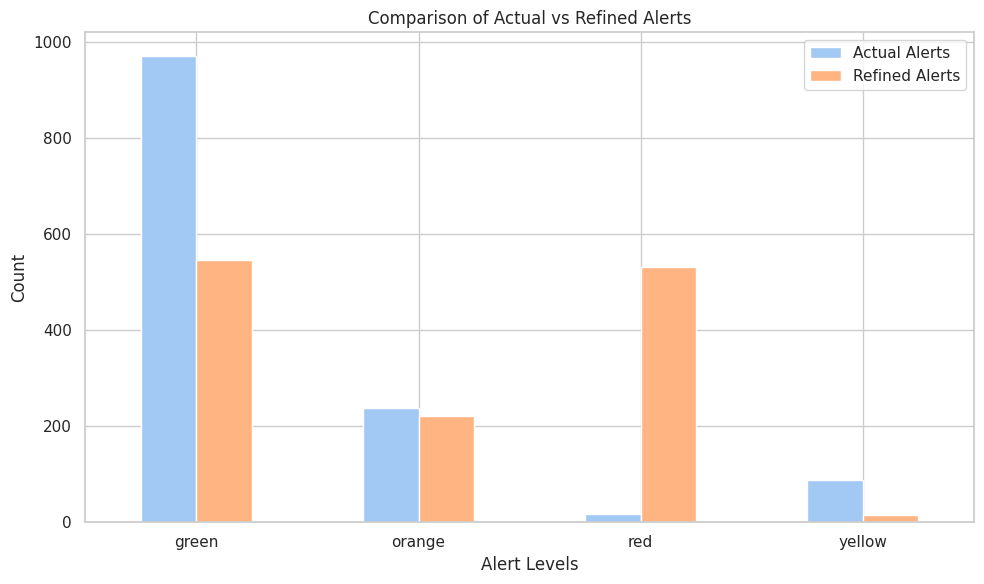

In [ ]:
# Visualization: Actual vs Refined Alerts
def plot_alert_distributions(df):
    actual_counts = df['alert'].value_counts()
    refined_counts = df['refined_alert'].value_counts()

    # DataFrame for comparison
    comparison_df = pd.DataFrame({
        'Actual Alerts': actual_counts,
        'Refined Alerts': refined_counts
    }).fillna(0)

    comparison_df.plot(kind='bar', figsize=(10, 6))
    plt.title('Comparison of Actual vs Refined Alerts')
    plt.xlabel('Alert Levels')
    plt.ylabel('Count')
    plt.xticks(rotation=0)
    plt.legend(loc="upper right")
    plt.tight_layout()
    plt.show()

plot_alert_distributions(df)


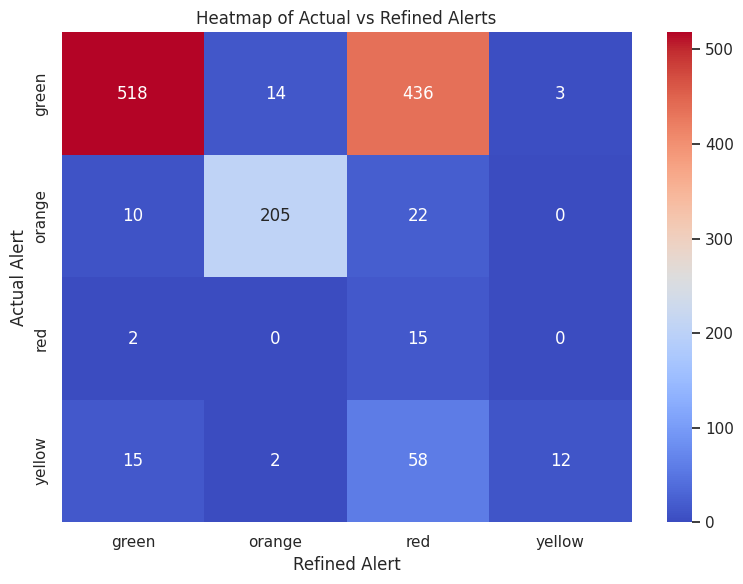

In [ ]:
# Heatmap: Actual vs Refined Alerts
def plot_mismatch_heatmap(df):
    # Confusion matrix
    mismatch_matrix = pd.crosstab(df['alert'], df['refined_alert'])

    plt.figure(figsize=(8, 6))
    sns.heatmap(mismatch_matrix, annot=True, cmap="coolwarm", fmt='d', cbar=True)
    plt.title('Heatmap of Actual vs Refined Alerts')
    plt.xlabel('Refined Alert')
    plt.ylabel('Actual Alert')
    plt.tight_layout()
    plt.show()

plot_mismatch_heatmap(df)

# Map visualization
alert_colors = {
    'green': 'green',
    'yellow': 'yellow',
    'orange': 'orange',
    'red': 'red'
}

df['alert_color'] = df['refined_alert'].map(alert_colors)
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.longitude, df.latitude))

In [ ]:
df['alert_color'] = df['refined_alert'].map(alert_colors)
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.longitude, df.latitude))

fig = px.scatter_geo(df,
                     lat='latitude',
                     lon='longitude',
                     color='alert_color',
                     color_discrete_map=alert_colors,
                     hover_name='title',
                     hover_data=['date_time', 'depth', 'magnitude', 'sig', 'cdi', 'mmi', 'country'],
                     title='Seismic Alert Levels by Location',
                     labels={'alert_color': 'Alert Level'},
                     template="plotly_dark")

fig.update_geos(showland=True, landcolor="lightgray", showlakes=True, lakecolor="white")
fig.show()

# Save the updated dataset
df.to_csv("Final_cleaned_data.csv", index=False)
print("File saved as 'Final_Refined_Alerts.csv'")

File saved as 'Final_Refined_Alerts.csv'
